In [1]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("C:/Users/admin/Desktop/ML-From-Scratch-master/ML-From-Scratch-master/")

# Import helper functions
from mlfromscratch.deep_learning import NeuralNetwork
from mlfromscratch.utils import train_test_split, to_categorical, normalize, Plot
from mlfromscratch.utils import get_random_subsets, shuffle_data, accuracy_score
from mlfromscratch.deep_learning.optimizers import StochasticGradientDescent, Adam, RMSprop, Adagrad, Adadelta
from mlfromscratch.deep_learning.loss_functions import CrossEntropy, SquareLoss
from mlfromscratch.utils.misc import bar_widgets
from mlfromscratch.deep_learning.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, Flatten


import pandas as pd
from numpy import save
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import time

In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
#----------------------------------------------------------------------------#

def fromComplexToReal(vect_im):
  
   # vect_real = []
    N = vect_im.shape[0]
    M = vect_im.shape[1]*2
    vect_real = np.zeros((N,M))

    print("\n [INFO] {fromComplexToReal} runing...")
    print("\n [INFO] vect_real.shape : " , vect_real.shape)

    for i in tqdm(range(len(vect_im))) :
        tmp = []
        for j in range(len(vect_im[i])) :
            z = vect_im[i][j]
            tmp.append(z.real)
            tmp.append(z.imag)
        vect_real[i] = tmp
        #vect_real.append(tmp)

    #vect_real = np.asarray(vect_real)
    print(" [INFO] {fromComplexToReal} vect_real.shape : ",vect_real.shape)

    return vect_real

#----------------------------------------------------------------------------#

def fromRealToComplex(vect_real):
  
    # init variables
    #vect_im = []
    N = vect_real.shape[0]
    M = vect_real.shape[1]//2
    
    vect_im = np.zeros((N,M), dtype=np.complex64)  

    print("\n [INFO] {fromRealToComplex} runing...")
    # iterate over the vector
    for i in tqdm(range(len(vect_real))) :
        tmp = []
        j = 0

        # we can't use for loop with range() we have no control over the index
        while j < len(vect_real[i]) :

          # y = a+j*b
          im = vect_real[i][j] + 1j*vect_real[i][j+1]
          # we already processed two elements 
          j = j + 2
          # append the new element to the output array
          tmp.append(im)

        # matrix i*j
        #vect_im.append(tmp)
        vect_im[i] = tmp
    # to numpy
    #vect_im = np.asarray(vect_im)
    print("[INFO] {fromRealToComplex} vect_im.shape : ",vect_im.shape)

    return vect_im

#----------------------------------------------------------------------------#

def fromRealToComplex2(vect_real):
  
    # init variables
    vect_im = []

    print("\n [INFO] {fromRealToComplex} runing...")
    # iterate over the vector
    for i in tqdm(range(len(vect_real))) :
        tmp = []
        j = 0

        # we can't use for loop with range() we have no control over the index
        while j < len(vect_real[i]) :

          # y = a+j*b
          im = vect_real[i][j] + 1j*vect_real[i][j+1]
          # we already processed two elements 
          j = j + 2
          # append the new element to the output array
          tmp.append(im)

        # matrix i*j
        vect_im.append(tmp)
    # to numpy
    vect_im = np.asarray(vect_im)
    print("[INFO] {fromRealToComplex} vect_im.shape : ",vect_im.shape)

    return vect_im

#----------------------------------------------------------------------------#

def prepareDataFrame(X, y, scaling) :

    X_real = fromComplexToReal(X)
    y_real = fromComplexToReal(y)

    data = np.column_stack((X_real,y_real))

    df_ = pd.DataFrame(data)

    if scaling :
      scaler = MinMaxScaler()
      df_ = scaler.fit_transform(df_)
      
    df_ = shuffle(df_)

    print("{prepareDataFrame} df_.shape : ",df_.shape)

    return df_

#----------------------------------------------------------------------------#

def prepareTrainAndTestData(df, withReshape, ts):

  #df = df.set_index('Attribute',inplace=True)
  
    N_samples = df.shape[0]
    N_features = df.shape[1]//2
    N_cols = df.shape[1]

    if type(df) != np.ndarray :
        print("[INFO] - {prepareTrainAndTestData} converting from pandas to numpy...")
        df_np = df.to_numpy()
        y = df_np[:N_samples,0:N_features]
        X = df_np[:N_samples,N_features:N_cols]
    else :
        y = df[:N_samples,0:N_features]
        X = df[:N_samples,N_features:N_cols]

    N_features = len(X[0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)

    N_samples_train = len(X_train)
    N_samples_test = len(X_test)

    if withReshape :
        X_train = X_train.reshape(N_samples_train, N_features, 1)
        X_test = X_test.reshape(N_samples_test, N_features, 1)
        y_train = y_train.reshape(N_samples_train, N_features, 1)
        y_test = y_test.reshape(N_samples_test, N_features, 1)

    print(X.shape)
    print(y.shape)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    return X_train, X_test, y_train, y_test
  
#----------------------------------------------------------------------------#

def prepareDataFrame(X, y, scaling) :

    X_real = fromComplexToReal(X)
    y_real = fromComplexToReal(y)

    data = np.column_stack((X_real,y_real))

    df_ = pd.DataFrame(data)

    if scaling :
      scaler = MinMaxScaler()
      df_ = scaler.fit_transform(df_)
      
    df_ = shuffle(df_)

    print("{prepareDataFrame} df_.shape : ",df_.shape)

    return df_

#----------------------------------------------------------------------------#

def prepareTrainAndTestData(df, withReshape, ts):

  #df = df.set_index('Attribute',inplace=True)
  
    N_samples = df.shape[0]
    N_features = df.shape[1]//2
    N_cols = df.shape[1]

    if type(df) != np.ndarray :
        print("[INFO] - {prepareTrainAndTestData} converting from pandas to numpy...")
        df_np = df.to_numpy()
        y = df_np[:N_samples,0:N_features]
        X = df_np[:N_samples,N_features:N_cols]
    else :
        y = df[:N_samples,0:N_features]
        X = df[:N_samples,N_features:N_cols]

    N_features = len(X[0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)

    N_samples_train = len(X_train)
    N_samples_test = len(X_test)

    if withReshape :
        X_train = X_train.reshape(N_samples_train, N_features, 1)
        X_test = X_test.reshape(N_samples_test, N_features, 1)
        y_train = y_train.reshape(N_samples_train, N_features, 1)
        y_test = y_test.reshape(N_samples_test, N_features, 1)

    print(X.shape)
    print(y.shape)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    return X_train, X_test, y_train, y_test
  
#----------------------------------------------------------------------------#

In [3]:
t1 = time.time()
d2= np.load('../data/data_1_30K_P6e-2.npz')
#d2= np.load('../data/data_1_90K_P6e-2_P5e-2_P2.6e-2.npz')
X = d2['X']
y = d2['y']

# if scaling=True, we are using min-max scaler
df = prepareDataFrame(X, y, scaling=False)
#df.to_csv("../data/data_90K.csv.gz", index=False, compression="gzip")
t2 = time.time()
print("Toral time to prepare the dataframe is : ", t2-t1, " seconds.")

X = df.iloc[:, 2048:4096]
y = df.iloc[:, 0:2048]

n_samples, n_features = X.shape
n_hidden = 512

  0%|                                                                              | 43/30000 [00:00<01:11, 421.59it/s]


 [INFO] {fromComplexToReal} runing...

 [INFO] vect_real.shape :  (30000, 2048)


  0%|▏                                                                             | 90/30000 [00:00<00:33, 899.64it/s]

 [INFO] {fromComplexToReal} vect_real.shape :  (30000, 2048)

 [INFO] {fromComplexToReal} runing...

 [INFO] vect_real.shape :  (30000, 2048)


100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:36<00:00, 813.73it/s]


 [INFO] {fromComplexToReal} vect_real.shape :  (30000, 2048)
{prepareDataFrame} df_.shape :  (30000, 4096)
Toral time to prepare the dataframe is :  84.74990367889404  seconds.
[INFO] - {prepareTrainAndTestData} converting from pandas to numpy...
(30000, 2048)
(30000, 2048)
(18000, 2048, 1)
(18000, 2048, 1)
(12000, 2048, 1)
(12000, 2048, 1)


In [15]:
withReshape = True
ts = 0.4
X_train, X_test, y_train, y_test = prepareTrainAndTestData(df, withReshape, ts)

[INFO] - {prepareTrainAndTestData} converting from pandas to numpy...
(30000, 2048)
(30000, 2048)
(18000, 2048, 1)
(18000, 2048, 1)
(12000, 2048, 1)
(12000, 2048, 1)


In [18]:
x_tr = X_train[0:1000,:,:]
x_te = X_test[1100:1500,:,:]
y_tr = y_train[0:1000,:,:]
y_te = y_test[1100:1500,:,:]

In [19]:
y_te.shape

(400, 2048, 1)

In [20]:
# Reshape X to (n_samples, channels, height, width)
X_train = x_tr.reshape((x_tr.shape[0],2,32,32))
X_test = x_te.reshape((x_te.shape[0],2,32,32))
y_train = np.squeeze(y_tr)
y_test = np.squeeze(y_te)

In [21]:
X_train.shape

(1000, 2, 32, 32)

In [22]:
index_plot = 689

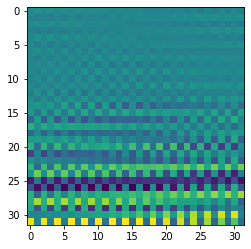

In [23]:
plt.imshow(X_train[index_plot][0])

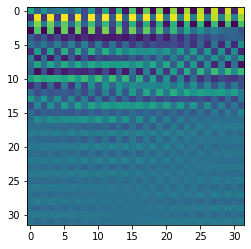

In [24]:
plt.imshow(X_train[index_plot][1])

In [25]:
optimizer = Adam()
opti = 'Adam'
n_features = 2048
n_output = 2048
clf = NeuralNetwork(optimizer=optimizer,
                        loss=SquareLoss,
                        validation_data=(X_test, y_test))

In [26]:
clf.add(Conv2D(n_filters=32, filter_shape=(3,3), stride=1, input_shape=(2,32,32), padding='same'))
clf.add(Activation('selu'))
clf.add(Dropout(0.25))
clf.add(BatchNormalization())
clf.add(Conv2D(n_filters=32, filter_shape=(3,3), stride=1, padding='same'))
clf.add(Activation('selu'))
clf.add(Dropout(0.25))
clf.add(BatchNormalization())
clf.add(Flatten())
clf.add(Dense(16))
clf.add(Activation('selu'))
clf.add(Dropout(0.4))
clf.add(BatchNormalization())
clf.add(Dense(n_output))
clf.add(Activation('selu'))
print ()
clf.summary(name="Conv2D")


+--------+
| Conv2D |
+--------+
Input Shape: (2, 32, 32)
+--------------------+------------+--------------+
| Layer Type         | Parameters | Output Shape |
+--------------------+------------+--------------+
| Conv2D             | 608        | (32, 32, 32) |
| Activation (SELU)  | 0          | (32, 32, 32) |
| Dropout            | 0          | (32, 32, 32) |
| BatchNormalization | 65536      | (32, 32, 32) |
| Conv2D             | 9248       | (32, 32, 32) |
| Activation (SELU)  | 0          | (32, 32, 32) |
| Dropout            | 0          | (32, 32, 32) |
| BatchNormalization | 65536      | (32, 32, 32) |
| Flatten            | 0          | (32768,)     |
| Dense              | 524304     | (16,)        |
| Activation (SELU)  | 0          | (16,)        |
| Dropout            | 0          | (16,)        |
| BatchNormalization | 32         | (16,)        |
| Dense              | 34816      | (2048,)      |
| Activation (SELU)  | 0          | (2048,)      |
+--------------------+-

In [27]:
num_epochs = 10
batch_size = 32

In [28]:
print("[INFO] Batch size : ", batch_size)
print("[INFO] Training epochs number : ", num_epochs)
train_err, val_err = clf.fit(X_train, y_train, num_epochs, batch_size=batch_size)

[INFO] Batch size :  32
[INFO] Training epochs number :  10


[INFO] Training loss on epoch  1  :  0.46162
[INFO] Validation loss on epoch  1  :  0.62825
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  2  :  0.38110
[INFO] Validation loss on epoch  2  :  0.36889
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  3  :  0.35000
[INFO] Validation loss on epoch  3  :  0.32711
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  4  :  0.33816
[INFO] Validation loss on epoch  4  :  0.31680
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  5  :  0.33085
[INFO] Validation loss on epoch  5  :  0.31323
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  6  :  0.32529
[INFO] Validation loss on epoch  6  :  0.31138
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  7  :  0.32103
[INFO] Validation loss on epoch  7  :  0.31039
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  8  :  0.31825
[INFO] Validation loss on epoch  8  :  0.30951
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  9  :  0.31598
[INFO] Validation loss on epoch  9  :  0.30862
-------------------------------------------------------------------------------


[INFO] Training loss on epoch  10  :  0.31362
[INFO] Validation loss on epoch  10  :  0.30755
-------------------------------------------------------------------------------


In [ ]:
num_epochs = 60
batch_size = 32

In [ ]:
print("[INFO] Batch size : ", batch_size)
print("[INFO] Training epochs number : ", num_epochs)
train_err, val_err = clf.fit(X_train, y_train, num_epochs, batch_size=batch_size)

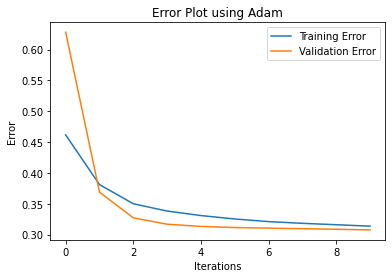

In [31]:
# Training and validation error plot
n = len(train_err)
training, = plt.plot(range(n), train_err, label="Training Error")
validation, = plt.plot(range(n), val_err, label="Validation Error")
plt.legend(handles=[training, validation])
plt.title("Error Plot using "+str(opti))
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()

In [32]:
_, loss = clf.test_on_batch(X_test, y_test)
print ("Test loss:", loss)

Test loss: 0


### Testing the Conv2D

In [34]:
x_tester = X_test.reshape(X_test.shape[0], -1, 2,32,32)
x_test_original = X_test.reshape(X_test.shape[0], 2048,1)

In [35]:
index_pred = 54

[[0.04409289 0.00688274 0.04464493 ... 0.06249855 0.03349153 0.05991256]]


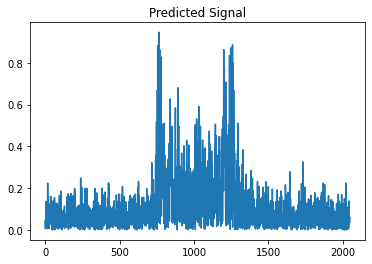

In [36]:
y_pred = clf.predict(x_tester[index_pred])
print(y_pred)
plt.title("Predicted Signal")
plt.plot(np.squeeze(np.abs(y_pred)))
plt.show()

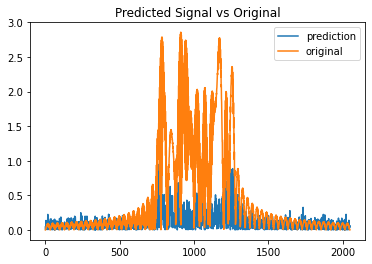

In [37]:
plt.title("Predicted Signal vs Original")
plt.plot(np.squeeze(np.abs(y_pred)), label="prediction")
plt.plot(np.squeeze(np.abs(y_test[index_pred])), label="original")
plt.legend()
plt.show()

In [38]:
print ("max val :", np.max(y_pred))
print ("shape  :", y_pred.shape)

max val : 0.9467448413274234
shape  : (1, 2048)


## More deep Conv2D

In [50]:
optimizer = Adam()
opti = 'Adam'
n_features = 2048
n_output = 2048
model_deep = NeuralNetwork(optimizer=optimizer,
                        loss=SquareLoss,
                        validation_data=(X_test, y_test))

In [51]:
model_deep.add(Conv2D(n_filters=128, filter_shape=(3,3), stride=1, input_shape=(2,32,32), padding='same'))
model_deep.add(Activation('selu'))
model_deep.add(Dropout(0.25))
model_deep.add(BatchNormalization())

model_deep.add(Conv2D(n_filters=64, filter_shape=(3,3), stride=1, padding='same'))
model_deep.add(Activation('selu'))
model_deep.add(Dropout(0.25))
model_deep.add(BatchNormalization())

model_deep.add(Flatten())

model_deep.add(Dense(32))
model_deep.add(Activation('selu'))
model_deep.add(Dropout(0.4))
model_deep.add(BatchNormalization())

model_deep.add(Dense(16))
model_deep.add(Activation('selu'))
model_deep.add(Dropout(0.4))
model_deep.add(BatchNormalization())

model_deep.add(Dense(32))
model_deep.add(Activation('selu'))
model_deep.add(Dropout(0.4))
model_deep.add(BatchNormalization())

model_deep.add(Dense(n_output))
model_deep.add(Activation('selu'))
print ()
model_deep.summary(name="Conv2D-deep")


+-------------+
| Conv2D-deep |
+-------------+
Input Shape: (2, 32, 32)
+--------------------+------------+---------------+
| Layer Type         | Parameters | Output Shape  |
+--------------------+------------+---------------+
| Conv2D             | 2432       | (128, 32, 32) |
| Activation (SELU)  | 0          | (128, 32, 32) |
| Dropout            | 0          | (128, 32, 32) |
| BatchNormalization | 262144     | (128, 32, 32) |
| Conv2D             | 73792      | (64, 32, 32)  |
| Activation (SELU)  | 0          | (64, 32, 32)  |
| Dropout            | 0          | (64, 32, 32)  |
| BatchNormalization | 131072     | (64, 32, 32)  |
| Flatten            | 0          | (65536,)      |
| Dense              | 2097184    | (32,)         |
| Activation (SELU)  | 0          | (32,)         |
| Dropout            | 0          | (32,)         |
| BatchNormalization | 64         | (32,)         |
| Dense              | 528        | (16,)         |
| Activation (SELU)  | 0          | (16,) 

### Training the model

In [52]:
num_epochs = 5
batch_size = 4

In [ ]:
print("[INFO] Batch size : ", batch_size)
print("[INFO] Training epochs number : ", num_epochs)
train_err, val_err = model_deep.fit(X_train, y_train, num_epochs, batch_size=batch_size)

[INFO] Batch size :  4
[INFO] Training epochs number :  5
